In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import xarray as xr
import cartopy.crs as ccrs
import shapely.geometry as sg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

REGIONS.loc[REGIONS['name'] == 'Trentino-alto adige/sudtirol', 'name'] = 'Trentino-alto'

In [3]:
data_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [4]:
data_dir = os.path.join(data_base,'CMORPH','1dy','CMORPH_Italy_1dy_1998_01_01_2024_01_31.nc')

DATA = xr.open_dataset(data_dir)

lon2d_CMORPH, lat2d_CMORPH  = np.meshgrid(DATA.lon.values, DATA.lat.values)

reso = 0.25

In [5]:
datos = []
for nn in range(19):
    lon_min, lat_min, lon_max, lat_max = REGIONS.geometry[nn].bounds
    lon_min, lat_min, lon_max, lat_max = lon_min-reso, lat_min-reso, lon_max+reso, lat_max+reso
    region_name = REGIONS.name[nn]
    # print(f'Region: {region_name}')

    region_area = sg.Polygon([
            (lon_min, lat_min),
            (lon_max, lat_min),
            (lon_max, lat_max),
            (lon_min, lat_max),
            (lon_min, lat_min)
                            ])
    rect_area = gpd.GeoDataFrame(geometry=[region_area], crs="EPSG:4326")

    extend_area = sg.Polygon([
            (lon_min-3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_min-3*reso)
                            ])
    rect_extend = gpd.GeoDataFrame(geometry=[extend_area], crs="EPSG:4326")
    
    # Extended area 
    EA_lon_min, EA_lat_min, EA_lon_max, EA_lat_max = extend_area.bounds
    # Downscaling area
    DA_lon_min, DA_lat_min, DA_lon_max, DA_lat_max = region_area.bounds
    fila = {
        'region': region_name,
        'DOW_lon_min': DA_lon_min,
        'DOW_lat_min': DA_lat_min,
        'DOW_lon_max': DA_lon_max,
        'DOW_lat_max': DA_lat_max,}
    datos.append(fila)

df_regiones = pd.DataFrame(datos)
# Remove Basilicata region
df_regiones = df_regiones[df_regiones['region'] != 'Basilicata']
# change name from Puglia to Puglia/Basilicata
df_regiones.loc[df_regiones['region'] == 'Puglia', 'region'] = 'Puglia/Basilicata'
df_regiones.loc[df_regiones['region'] == 'Trentino-alto adige/sudtirol', 'region'] = 'Trentino-alto'
df_regiones = df_regiones.reset_index(drop=True, inplace=False)

name_out = os.path.join('..','csv','Regions_boundaries.csv')
df_regiones.to_csv(name_out, index=False, header=True)

In [7]:
df_regiones

,region,DOW_lon_min,DOW_lat_min,DOW_lon_max,DOW_lat_max
0,Abruzzo,12.768488,41.432106,15.033014,43.144715
1,Calabria,15.380178,37.665754,17.456526,40.393926
2,Campania,13.512113,39.740560,16.055766,41.757370
3,Emilia-romagna,8.949196,43.481924,13.005641,45.389114
4,Friuli venezia giulia,12.072750,45.332894,14.168066,46.895428
5,Lazio,11.199780,40.953920,14.277500,43.088683
6,Liguria,7.245687,43.526556,10.321019,44.926151
7,Lombardia,8.248337,44.429947,11.676742,46.885187
8,Marche,11.935454,42.437156,14.166727,44.218635
9,Molise,13.691015,41.113962,15.411499,42.319826


Region: Abruzzo
Region: Calabria
Region: Campania
Region: Emilia-romagna
Region: Friuli venezia giulia
Region: Lazio
Region: Liguria
Region: Lombardia
Region: Marche
Region: Molise
Region: Piemonte
Region: Puglia/Basilicata
Region: Sardegna
Region: Sicilia
Region: Toscana
Region: Trentino-alto
Region: Umbria
Region: Valle d'aosta


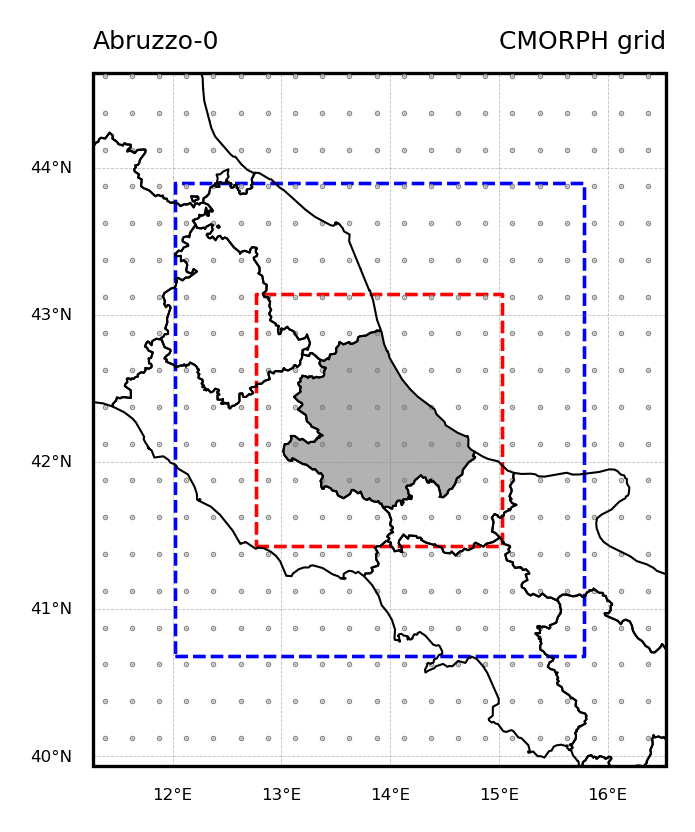

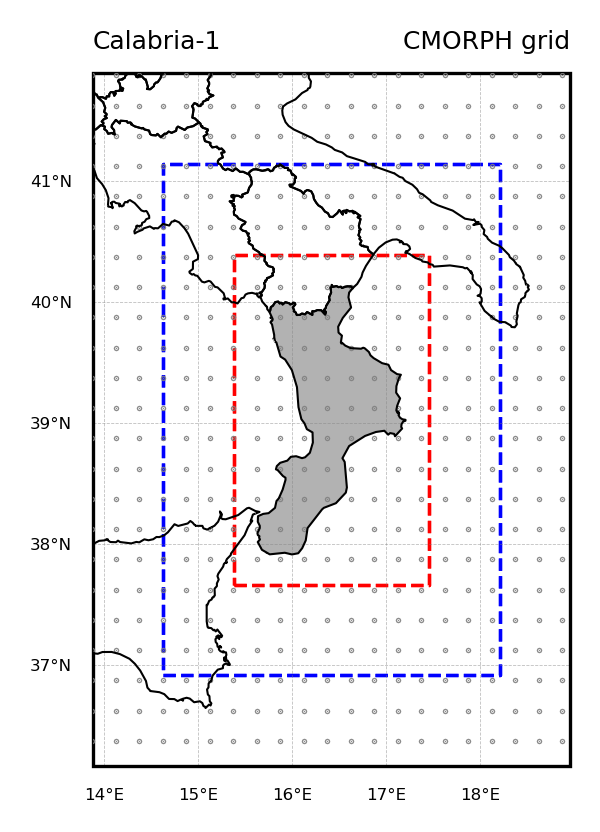

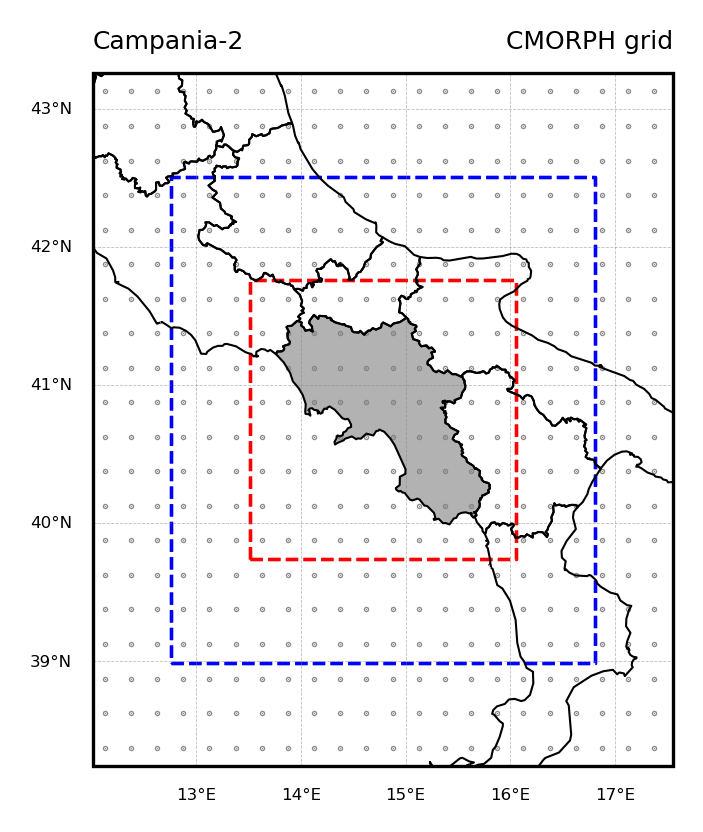

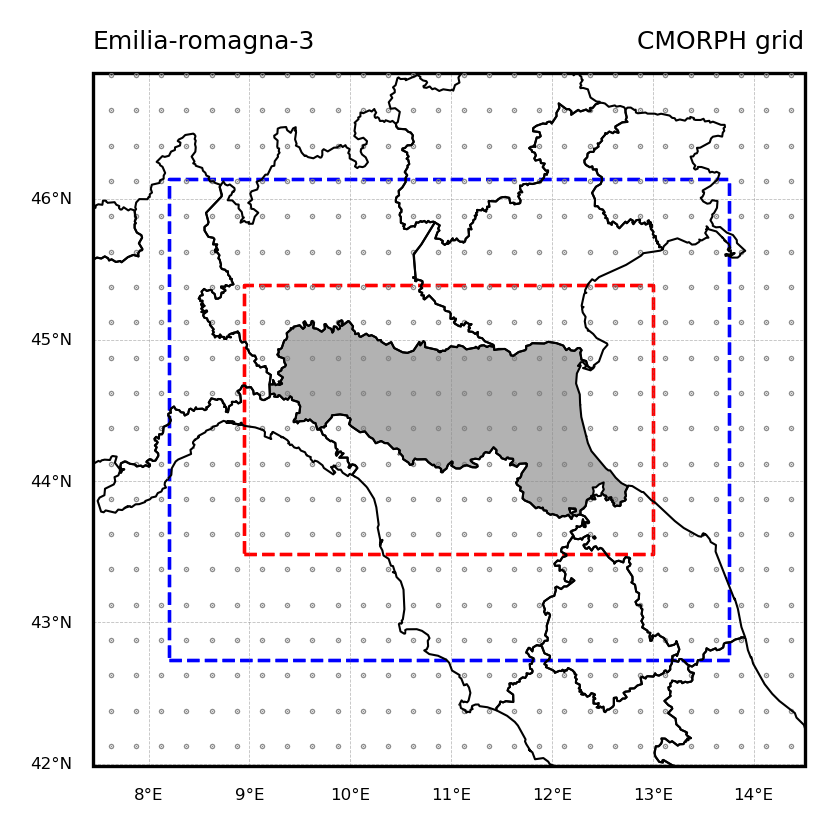

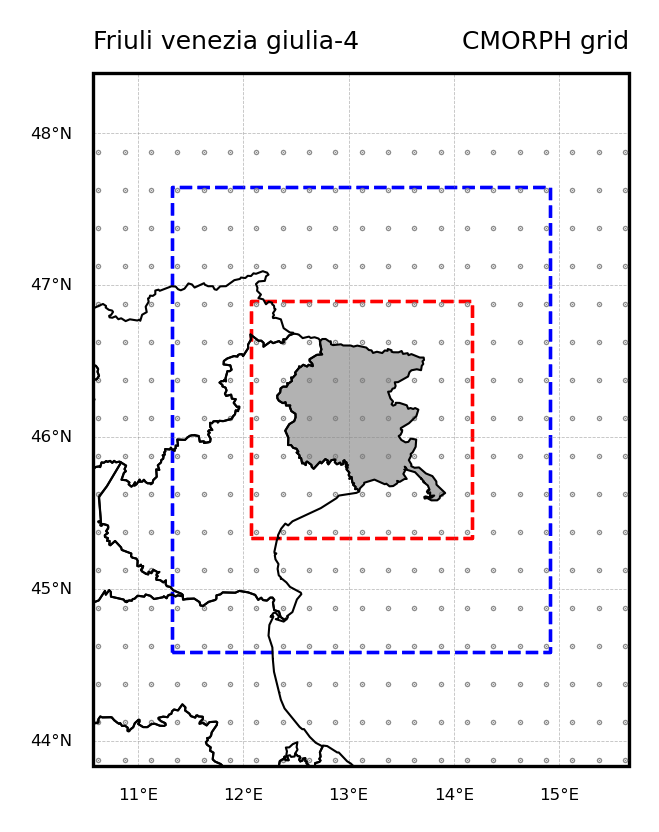

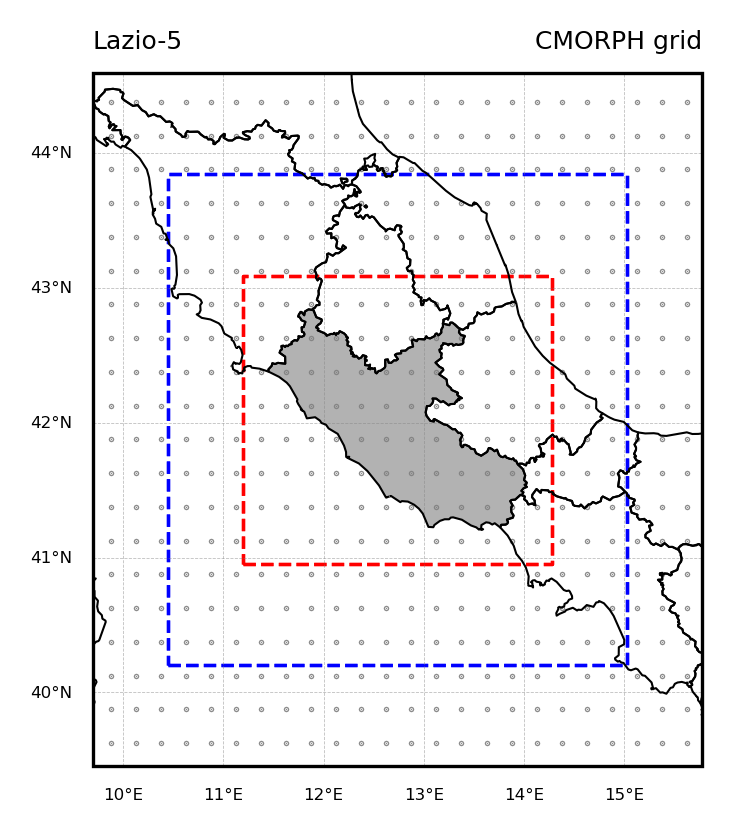

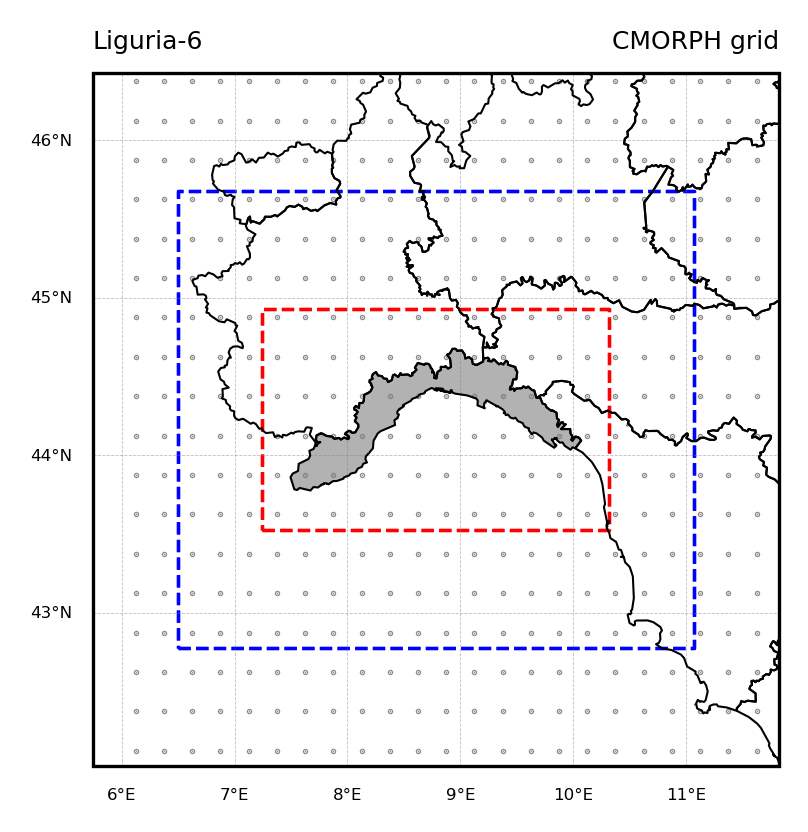

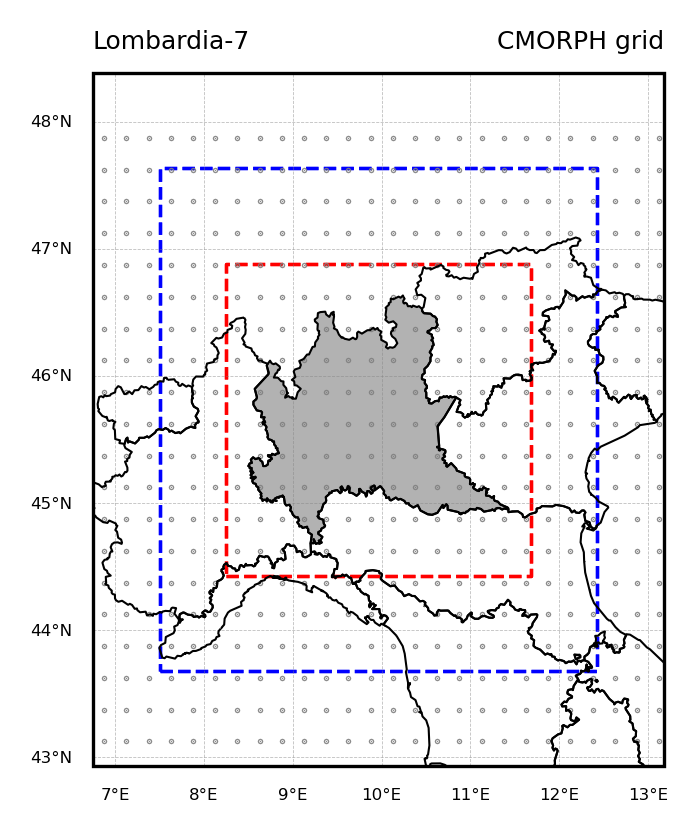

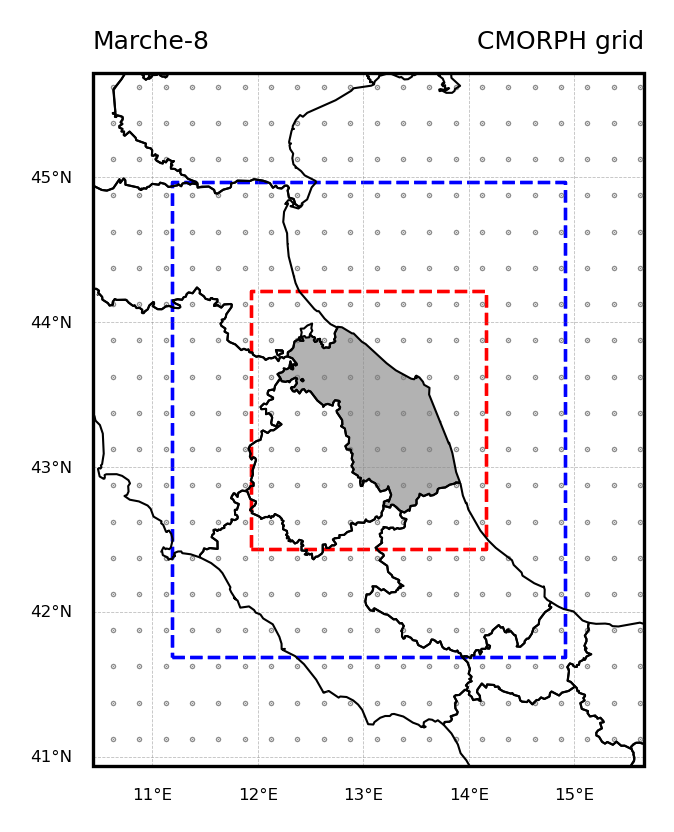

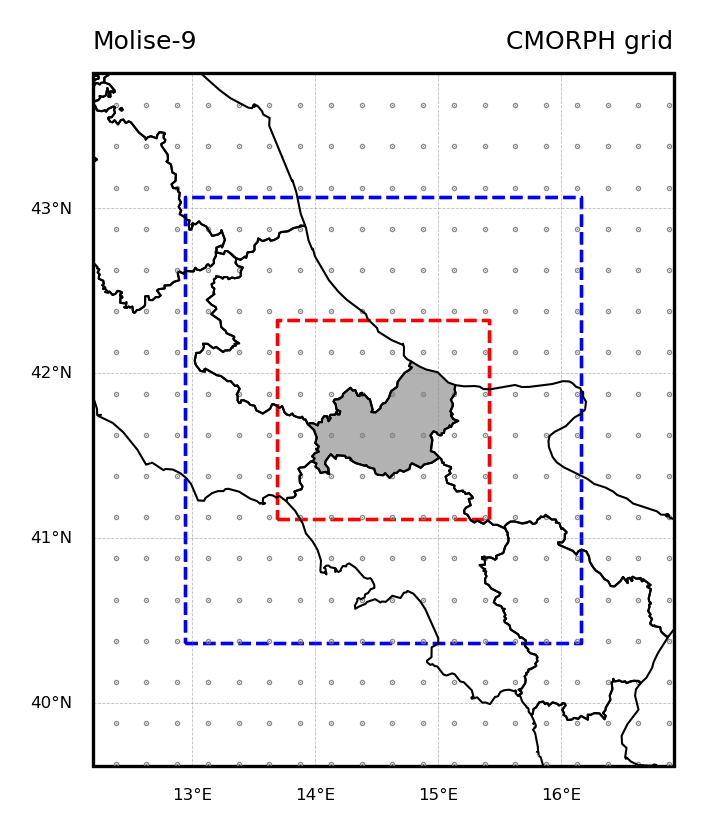

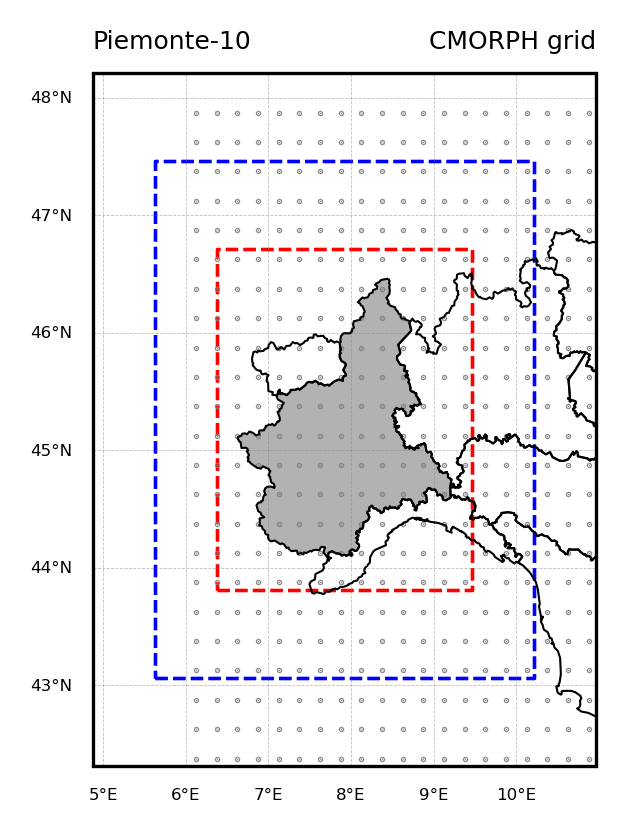

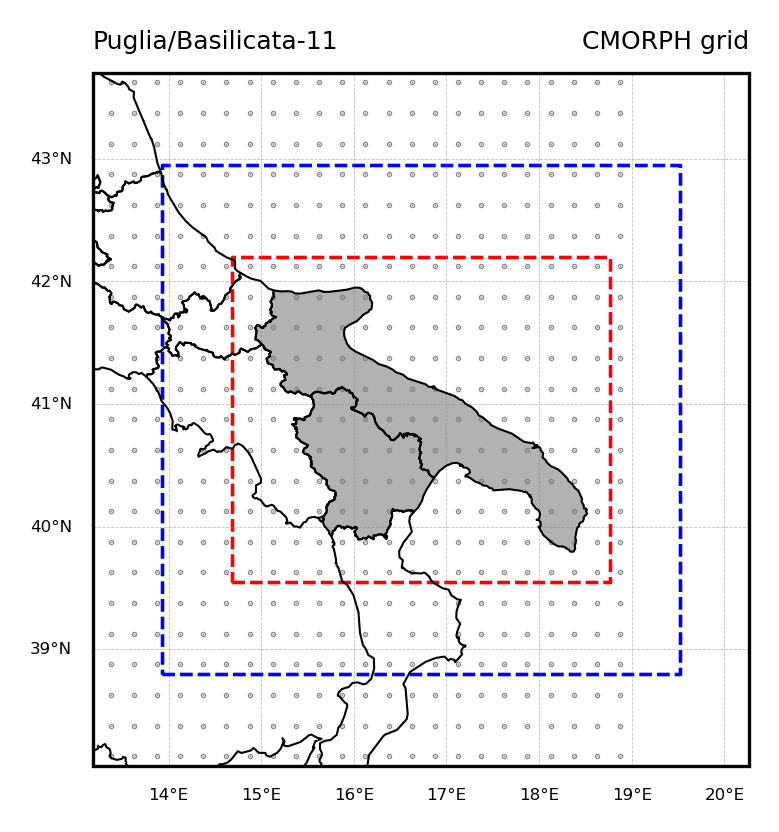

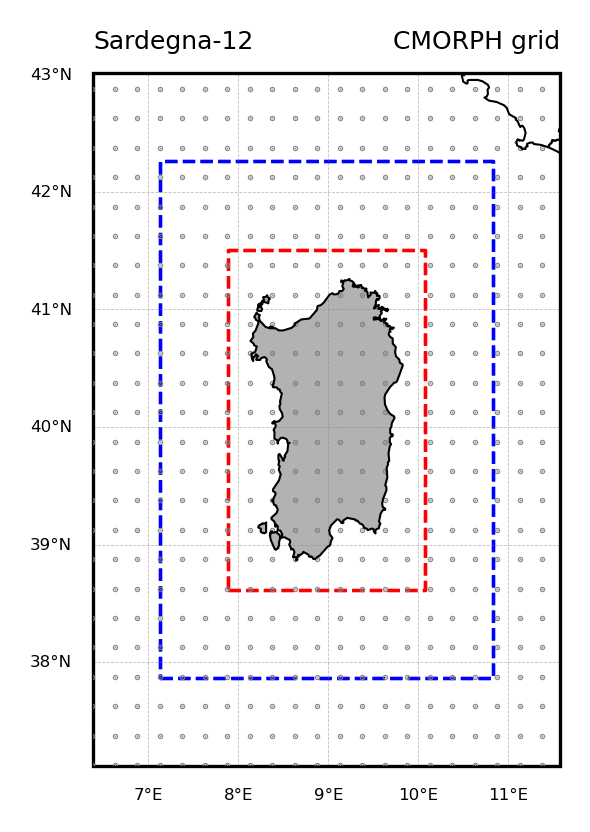

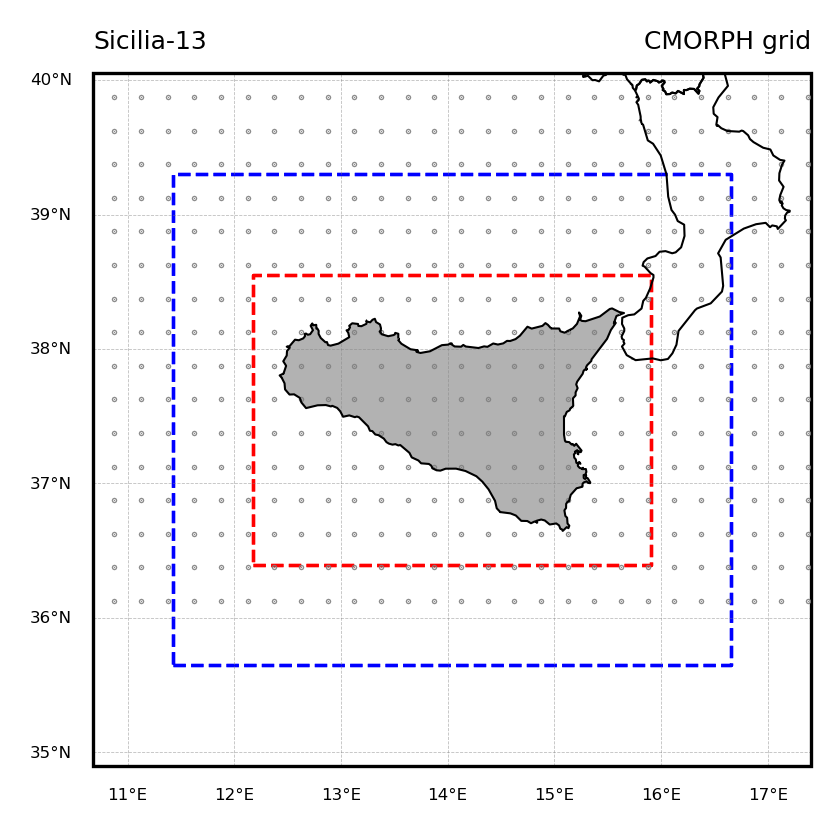

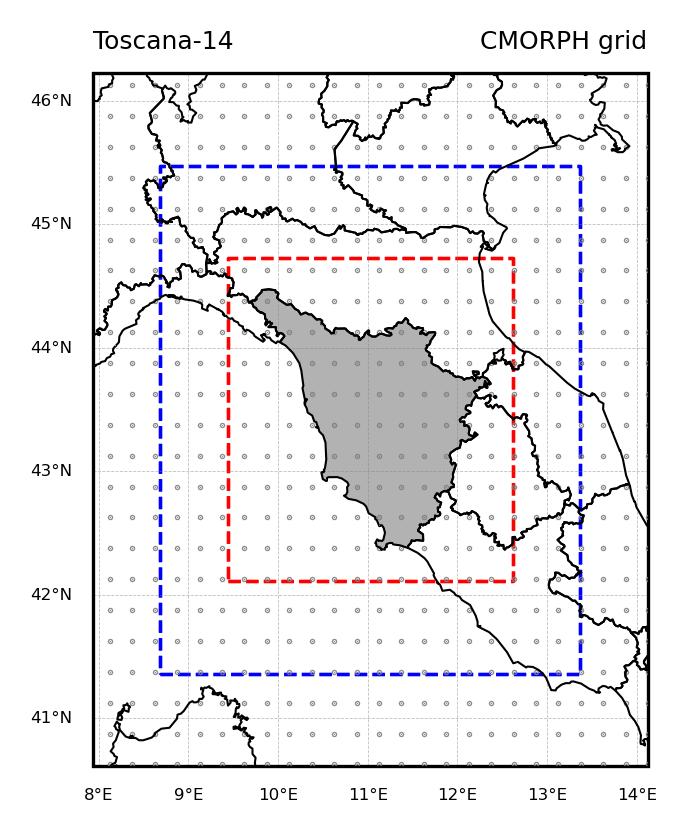

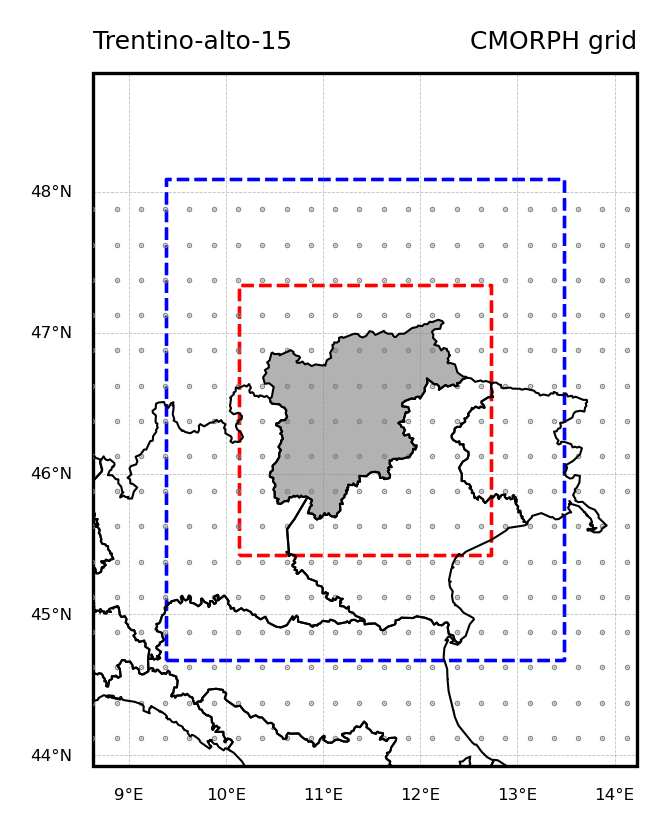

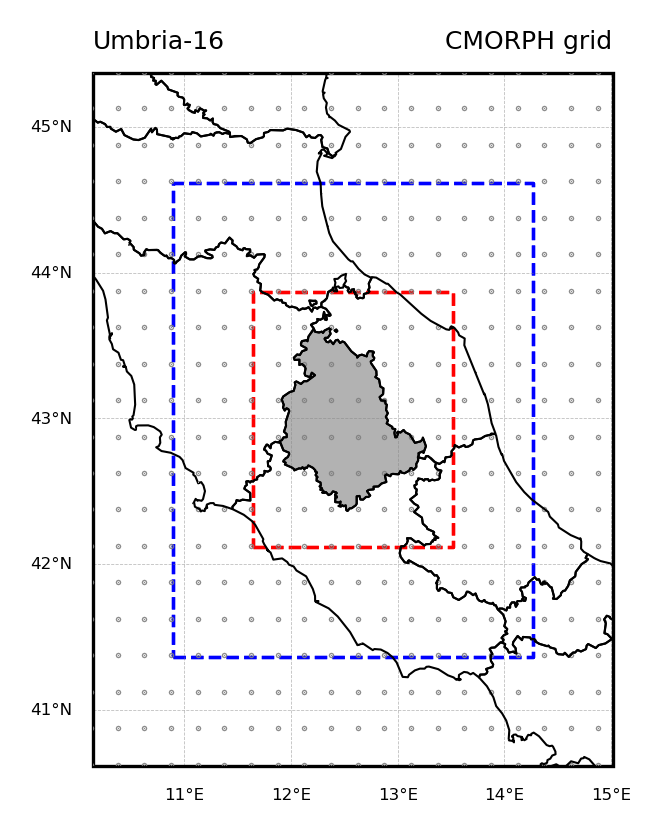

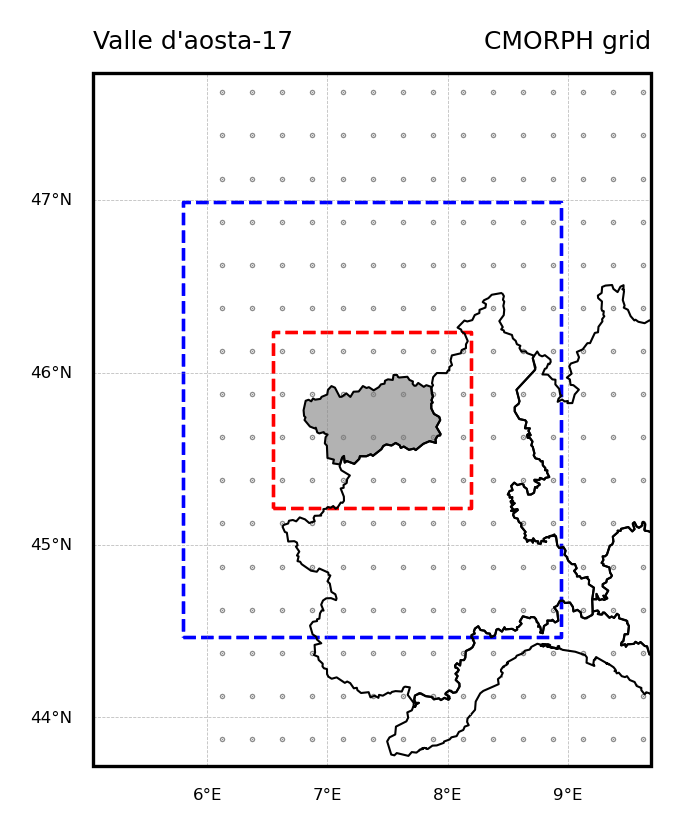

In [8]:
for nn in range(len(df_regiones)):
        region_name = df_regiones['region'].values[nn]
        print(f'Region: {region_name}')

        extend_area = sg.Polygon([
                (df_regiones['DOW_lon_min'].values[nn]-3*reso, df_regiones['DOW_lat_min'].values[nn]-3*reso),
                (df_regiones['DOW_lon_max'].values[nn]+3*reso, df_regiones['DOW_lat_min'].values[nn]-3*reso),
                (df_regiones['DOW_lon_max'].values[nn]+3*reso, df_regiones['DOW_lat_max'].values[nn]+3*reso),
                (df_regiones['DOW_lon_min'].values[nn]-3*reso, df_regiones['DOW_lat_max'].values[nn]+3*reso),
                (df_regiones['DOW_lon_min'].values[nn]-3*reso, df_regiones['DOW_lat_min'].values[nn]-3*reso)])
        rect_extend = gpd.GeoDataFrame(geometry=[extend_area], crs="EPSG:4326")

        region_down = sg.Polygon([
                (df_regiones['DOW_lon_min'].values[nn], df_regiones['DOW_lat_min'].values[nn]),
                (df_regiones['DOW_lon_max'].values[nn], df_regiones['DOW_lat_min'].values[nn]),
                (df_regiones['DOW_lon_max'].values[nn], df_regiones['DOW_lat_max'].values[nn]),
                (df_regiones['DOW_lon_min'].values[nn], df_regiones['DOW_lat_max'].values[nn]),
                (df_regiones['DOW_lon_min'].values[nn], df_regiones['DOW_lat_min'].values[nn])])
        rect_down = gpd.GeoDataFrame(geometry=[region_down], crs="EPSG:4326")

        cmap = plt.cm.Spectral_r
        proj = ccrs.PlateCarree()

        fig = plt.figure(figsize=(4,3),dpi=300)
        gs = gridspec.GridSpec(1,1)

        ax1 = plt.subplot(gs[0, 0], projection = proj)
        ax1.set_extent([df_regiones['DOW_lon_min'].values[nn]-1.5, df_regiones['DOW_lon_max'].values[nn]+1.5, 
                        df_regiones['DOW_lat_min'].values[nn]-1.5, df_regiones['DOW_lat_max'].values[nn]+1.5],crs=proj)
        ax1.scatter(lon2d_CMORPH, lat2d_CMORPH, c='grey', s=0.1, alpha=0.9, zorder=10)
        REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)
        rect_down.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
        rect_extend.plot(ax=ax1, edgecolor='b', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
        if region_name == 'Puglia/Basilicata':
                gpd.GeoSeries(REGIONS[REGIONS['name']=='Basilicata'].geometry).plot(facecolor='grey', ax=ax1, linewidth=0.5, zorder=2, alpha=0.6)
                gpd.GeoSeries(REGIONS[REGIONS['name']=='Puglia'].geometry).plot(facecolor='grey', ax=ax1, linewidth=0.5, zorder=2, alpha=0.6)
                rect_down.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
                rect_extend.plot(ax=ax1, edgecolor='b', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
        else:
                gpd.GeoSeries(REGIONS[REGIONS['name']==region_name].geometry).plot(facecolor='grey', ax=ax1, linewidth=0.5, zorder=2, alpha=0.6)
                rect_down.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
                rect_extend.plot(ax=ax1, edgecolor='b', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)

        gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
        gl.top_labels = False
        gl.bottom_labels = True
        gl.right_labels = False
        gl.left_labels =True
        gl.xlabel_style = {'size': 4, 'color': 'k'}
        gl.ylabel_style = {'size': 4, 'color': 'k'}

        ax1.set_title(f'{region_name}-{nn}', fontsize=6, loc='left')
        ax1.set_title('CMORPH grid', fontsize=6, loc='right')

        ax1.set_facecolor('white')
        fig.patch.set_alpha(0)

Region: Abruzzo
Region: Basilicata
Region: Calabria
Region: Campania
Region: Emilia-romagna
Region: Friuli venezia giulia
Region: Lazio
Region: Liguria
Region: Lombardia
Region: Marche
Region: Molise
Region: Piemonte
Region: Puglia
Region: Sardegna
Region: Sicilia
Region: Toscana
Region: Trentino-alto
Region: Umbria
Region: Valle d'aosta
Region: Veneto


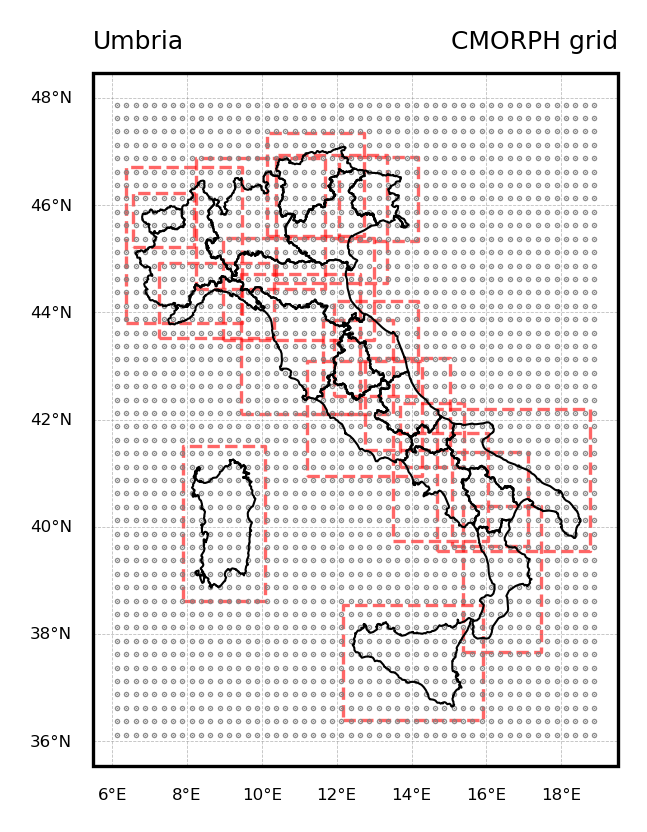

In [86]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([lon_min-1.5, lon_max+1.5, lat_min-1.5, lat_max+1.5],crs=proj)
ax1.scatter(lon2d_CMORPH, lat2d_CMORPH, c='grey', s=0.1, alpha=0.9, zorder=10)

REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.5)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.set_title(REGIONS.name[nn], fontsize=6, loc='left')
ax1.set_title('CMORPH grid', fontsize=6, loc='right')

for nn in range(20):

    lon_min, lat_min, lon_max, lat_max = REGIONS.geometry[nn].bounds
    lon_min, lat_min, lon_max, lat_max = lon_min-reso, lat_min-reso, lon_max+reso, lat_max+reso
    print(f'Region: {REGIONS.name[nn]}')

    region_area = sg.Polygon([
            (lon_min, lat_min),
            (lon_max, lat_min),
            (lon_max, lat_max),
            (lon_min, lat_max),
            (lon_min, lat_min)
                            ])
    rect_area = gpd.GeoDataFrame(geometry=[region_area], crs="EPSG:4326")

    extend_area = sg.Polygon([
            (lon_min-3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_min-3*reso),
            (lon_max+3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_max+3*reso),
            (lon_min-3*reso, lat_min-3*reso)
                            ])
    rect_extend = gpd.GeoDataFrame(geometry=[extend_area], crs="EPSG:4326")

    rect_area.plot(ax=ax1, edgecolor='r', facecolor='None', linestyle='--', linewidth=0.8, zorder=1, alpha=0.6)
    # rect_extend.plot(ax=ax1, edgecolor='b', facecolor='None', linestyle='--', linewidth=0.8, zorder=1)
    
    ax1.set_facecolor('white')
    fig.patch.set_alpha(0)